In [54]:
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import statsmodels.api as sm
import numpy as np

from datetime import date
from numpy import log

sys.path.append(os.getcwd() + '/../..')
import macrodata as md

In [55]:
start_dt = date(2015, 1, 1)
end_dt = date(2023, 2, 1)

In [56]:
spreads = md.Explorer.listHistory(['us_HY_spread'], start_dt, end_dt)

In [57]:
items = ['us_cpi',
         'us_nonfarm_payroll_sa',
         'us_avg_hour_earn_sa',
         'us_unemployment',
         'us_M1',
         'us_michigan_cons_conf',
         'us_10y_real_rate2',
         'us_durable_goods_new_orders',
         'us_new_home_sales',
         'us_housing_starts',
         'us_mortgage_30y',
         'us_mortgage_15y']

In [58]:
macro = md.Explorer.listHistory(items, start_dt, end_dt)

In [59]:
macro.interpolate(inplace=True, limit_area='inside')

In [60]:
diff_items = ['us_cpi',
              'us_M1',
              'us_durable_goods_new_orders',
              'us_new_home_sales',
              'us_housing_starts']
macro.loc[:, diff_items] = macro.loc[:, diff_items].apply(lambda x: log(x)).diff()

In [61]:
X = macro.iloc[1:]
X = sm.add_constant(X)

In [62]:
Y = spreads.iloc[1:]
y = Y['us_HY_spread']

In [25]:
# Interactive process :
X = X.loc[:, X.columns != 'us_new_home_sales']

In [28]:
# Last run of the model. :
X.columns

Index(['const', 'us_cpi', 'us_nonfarm_payroll_sa', 'us_avg_hour_earn_sa',
       'us_unemployment', 'us_michigan_cons_conf',
       'us_durable_goods_new_orders'],
      dtype='object')

In [63]:
#Updating from last run :
X = X.loc[:, ['const', 'us_cpi', 'us_nonfarm_payroll_sa', 'us_avg_hour_earn_sa',
       'us_unemployment', 'us_michigan_cons_conf',
       'us_durable_goods_new_orders']]

In [64]:
model = sm.OLS(y, X).fit()

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           us_HY_spread   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     16.51
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           1.06e-12
Time:                        09:23:33   Log-Likelihood:                -118.29
No. Observations:                  96   AIC:                             250.6
Df Residuals:                      89   BIC:                             268.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -7.8187      9.296     -0.841      0.403     -26.289      10.652
us_cpi                        -59.3522     28.730     -2.066      0.042    -116.438      -2.267
us_nonfarm_payroll_sa           0.0003   7.94e-05      3.354      0.001       0.000       0.000
us_avg_hour_earn_sa            -0.7630      0.124     -6.151      0.000      -1.009      -0.517
us_unemployment                 0.6872      0.164      4.183      0.000       0.361       1.014
us_michigan_cons_conf          -0.0979      0.014     -6.848      0.000      -0.126      -0.070
us_durable_goods_new_orders    -3.5965      2.024     -1.777      0.079      -7.619       0.426
==============================================================================
Omnibus:                       34.142   Durbin-Watson:                   0.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.787
Skew:                           1.407   Prob(JB):                     3.14e-15
Kurtosis:                       5.963   Cond. No.                     4.82e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

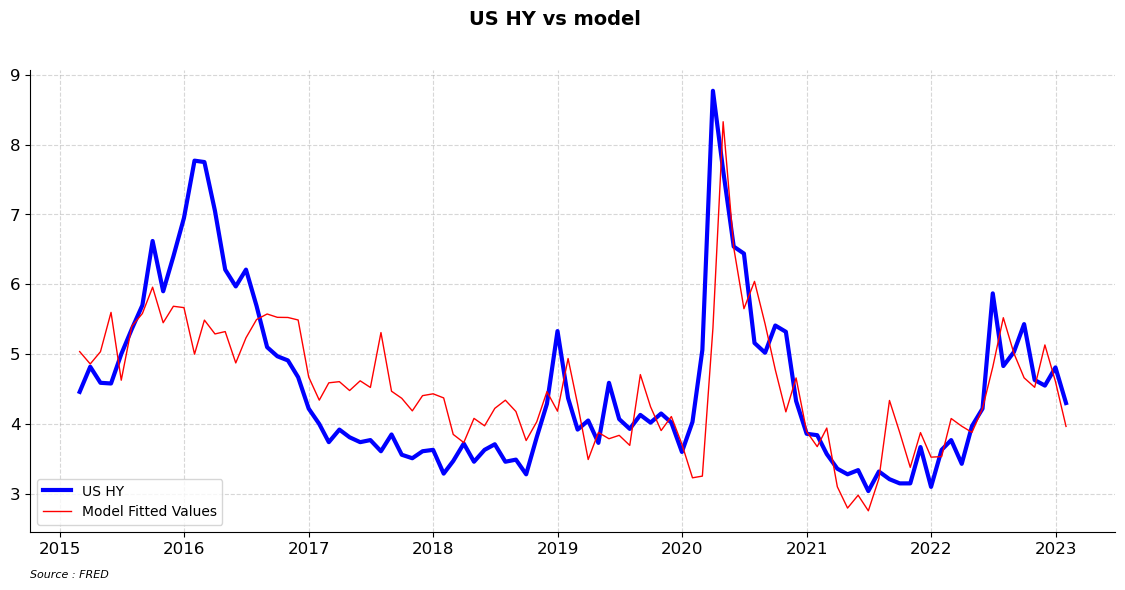

In [66]:
f, ax = plt.subplots(figsize=(14,6))
f.suptitle('US HY vs model', fontsize = 14, fontweight = 'bold')

ax.plot(y.index, y, color = 'blue', lw = 3, label = 'US HY')
ax.plot(y.index, model.predict(), color = 'r', lw = 1, label = 'Model Fitted Values')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha = 0.5, ls = '--')
ax.legend(loc = 'lower left')

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax.text(0, -0.1, 'Source : FRED',
              fontstyle = 'italic',
              fontsize = 8,
              transform = ax.transAxes)

In [73]:
np.linspace(X[i].min(), X[i].max(), 20)

array([ 3.4       ,  3.99473684,  4.58947368,  5.18421053,  5.77894737,
        6.37368421,  6.96842105,  7.56315789,  8.15789474,  8.75263158,
        9.34736842,  9.94210526, 10.53684211, 11.13157895, 11.72631579,
       12.32105263, 12.91578947, 13.51052632, 14.10526316, 14.7       ])

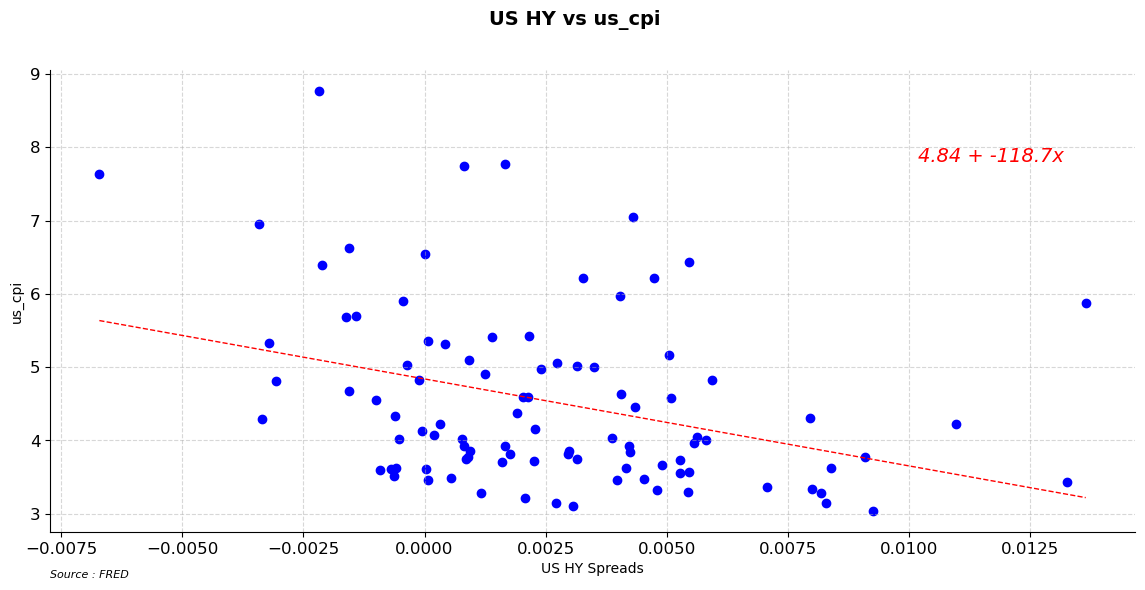

In [77]:
#Params
i = 'us_cpi'
x = sm.add_constant(X[i])
model = sm.OLS(y, x).fit()

_x = np.linspace(X[i].min(), X[i].max(), 5)
_y = model.params[1]*_x + model.params[0]

#Plot
f, ax = plt.subplots(figsize=(14,6))
f.suptitle(f'US HY vs {i}', fontsize = 14, fontweight = 'bold')

ax.scatter(X[i], y, color = 'blue')
ax.plot(_x, _y, color='red', lw=1, ls='dashed')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha = 0.5, ls = '--')
ax.set_xlabel('US HY Spreads')
ax.set_ylabel(i)

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax.text(0.8, 0.8, f'{round(model.params[0], 2)} + {round(model.params[1], 2)}x',
              fontstyle = 'italic',
                color='red',
              fontsize = 14, 
              transform = ax.transAxes)

void = ax.text(0, -0.1, 'Source : FRED',
              fontstyle = 'italic',
              fontsize = 8,
              transform = ax.transAxes)

In [ ]:
# Normalized

In [68]:
_X = X.loc[:, X.columns != 'const']
norm_X = (_X-_X.min()) / (_X.max() - _X.min())
norm_y = (y-y.min()) / (y.max() - y.min())

In [86]:
#Interactive
norm_X = norm_X.loc[:, norm_X.columns != 'us_new_home_sales']

In [69]:
norm_model = sm.OLS(norm_y, norm_X).fit()

In [70]:
norm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           us_HY_spread   R-squared (uncentered):                   0.796
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                              58.50
Date:                Wed, 01 Mar 2023   Prob (F-statistic):                    6.05e-29
Time:                        09:23:58   Log-Likelihood:                          45.036
No. Observations:                  96   AIC:                                     -78.07
Df Residuals:                      90   BIC:                                     -62.69
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
us_cpi                         -0.1136      0.100     -1.135      0.259      -0.312       0.085
us_nonfarm_payroll_sa           1.8845      0.230      8.199      0.000       1.428       2.341
us_avg_hour_earn_sa            -1.2974      0.171     -7.580      0.000      -1.637      -0.957
us_unemployment                 2.0827      0.210      9.904      0.000       1.665       2.500
us_michigan_cons_conf          -0.8675      0.133     -6.508      0.000      -1.132      -0.603
us_durable_goods_new_orders    -0.1054      0.121     -0.868      0.387      -0.347       0.136
==============================================================================
Omnibus:                       32.047   Durbin-Watson:                   0.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.620
Skew:                           1.370   Prob(JB):                     3.08e-13
Kurtosis:                       5.627   Cond. No.                         30.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
[{x : round(np.corrcoef((norm_y, norm_X[x]))[0, 1], 2)} for x in norm_X.columns]

[{'us_cpi': -0.35},
 {'us_nonfarm_payroll_sa': -0.42},
 {'us_avg_hour_earn_sa': -0.23},
 {'us_unemployment': 0.38},
 {'us_michigan_cons_conf': -0.08},
 {'us_10y_real_rate2': 0.1},
 {'us_mortgage_15y': -0.01}]

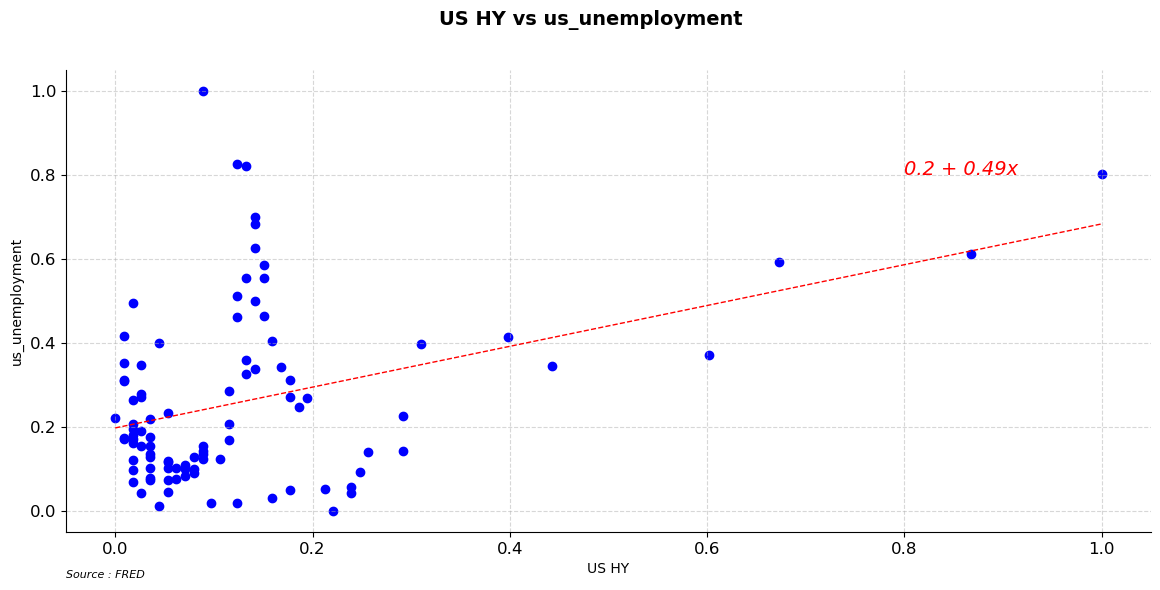

In [78]:
#Params
i = 'us_unemployment'
x = sm.add_constant(norm_X[i])
model = sm.OLS(norm_y, x).fit()

_x = np.linspace(norm_X[i].min(), norm_X[i].max(), 5)
_y = model.params[1]*_x + model.params[0]


#Plot
f, ax = plt.subplots(figsize=(14,6))
f.suptitle(f'US HY vs {i}', fontsize = 14, fontweight = 'bold')

ax.scatter(norm_X[i], norm_y, color = 'blue')
ax.plot(_x, _y, color='red', lw=1, ls='dashed')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha = 0.5, ls = '--')
ax.set_xlabel('US HY')
ax.set_ylabel(i)

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax.text(0.8, 0.8, f'{round(model.params[0], 2)} + {round(model.params[1], 2)}x',
              fontstyle = 'italic',
                color='red',
              fontsize = 14)

void = ax.text(0, -0.1, 'Source : FRED',
              fontstyle = 'italic',
              fontsize = 8,
              transform = ax.transAxes)

### EM Spread Analyses

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import statsmodels.api as sm
import numpy as np

from datetime import date
from numpy import log

sys.path.append(os.getcwd() + '/../..')
import macrodata as md

In [2]:
start_dt = date(2015, 1, 1)
end_dt = date(2023, 2, 1)

In [3]:
spreads = md.Explorer.listHistory(['us_EM_spread'], start_dt, end_dt)

In [6]:
items = ['us_cpi',
         'us_nonfarm_payroll_sa',
         'us_avg_hour_earn_sa',
         'us_IG_spread',
         'us_HY_spread',
         'us_unemployment',
         'us_M1',
         'us_michigan_cons_conf',
         'us_10y_real_rate2',
         'us_durable_goods_new_orders',
         'us_new_home_sales',
         'us_housing_starts',
         'us_mortgage_30y',
         'us_mortgage_15y']

In [7]:
macro = md.Explorer.listHistory(items, start_dt, end_dt)
macro.interpolate(inplace=True, limit_area='inside')
diff_items = ['us_cpi',
              'us_M1',
              'us_durable_goods_new_orders',
              'us_new_home_sales',
              'us_housing_starts']
macro.loc[:, diff_items] = macro.loc[:, diff_items].apply(lambda x: log(x)).diff()

In [8]:
X = macro.iloc[1:]
X = sm.add_constant(X)

In [9]:
y = spreads.iloc[1:]

In [25]:
# Interactive process :
X = X.loc[:, X.columns != 'us_mortgage_30y']

In [26]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           us_EM_spread   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     179.9
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.57e-47
Time:                        20:16:55   Log-Likelihood:                 17.524
No. Observations:                  96   AIC:                            -21.05
Df Residuals:                      89   BIC:                            -3.097
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    16.0387      2.307      6.951      0.000      11.454      20.624
us_nonfarm_payroll_sa    -0.0001   1.73e-05     -6.921      0.000      -0.000   -8.55e-05
us_avg_hour_earn_sa       0.1073      0.018      6.102      0.000       0.072       0.142
us_IG_spread              1.4444      0.192      7.505      0.000       1.062       1.827
us_HY_spread              0.1935      0.053      3.652      0.000       0.088       0.299
us_unemployment          -0.2167      0.035     -6.195      0.000      -0.286      -0.147
us_10y_real_rate2        -0.1437      0.045     -3.197      0.002      -0.233      -0.054
==============================================================================
Omnibus:                        5.519   Durbin-Watson:                   0.630
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.003
Skew:                           0.547   Prob(JB):                       0.0820
Kurtosis:                       3.236   Cond. No.                     1.59e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

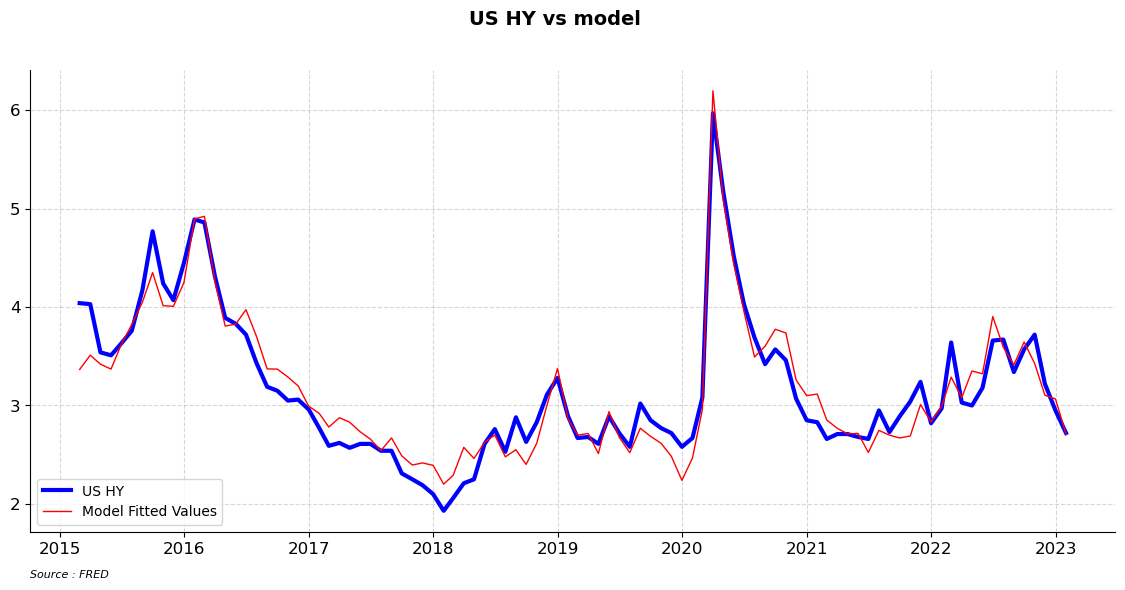

In [27]:
f, ax = plt.subplots(figsize=(14,6))
f.suptitle('US HY vs model', fontsize = 14, fontweight = 'bold')

ax.plot(y.index, y, color = 'blue', lw = 3, label = 'US HY')
ax.plot(y.index, model.predict(), color = 'r', lw = 1, label = 'Model Fitted Values')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha = 0.5, ls = '--')
ax.legend(loc = 'lower left')

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax.text(0, -0.1, 'Source : FRED',
              fontstyle = 'italic',
              fontsize = 8,
              transform = ax.transAxes)

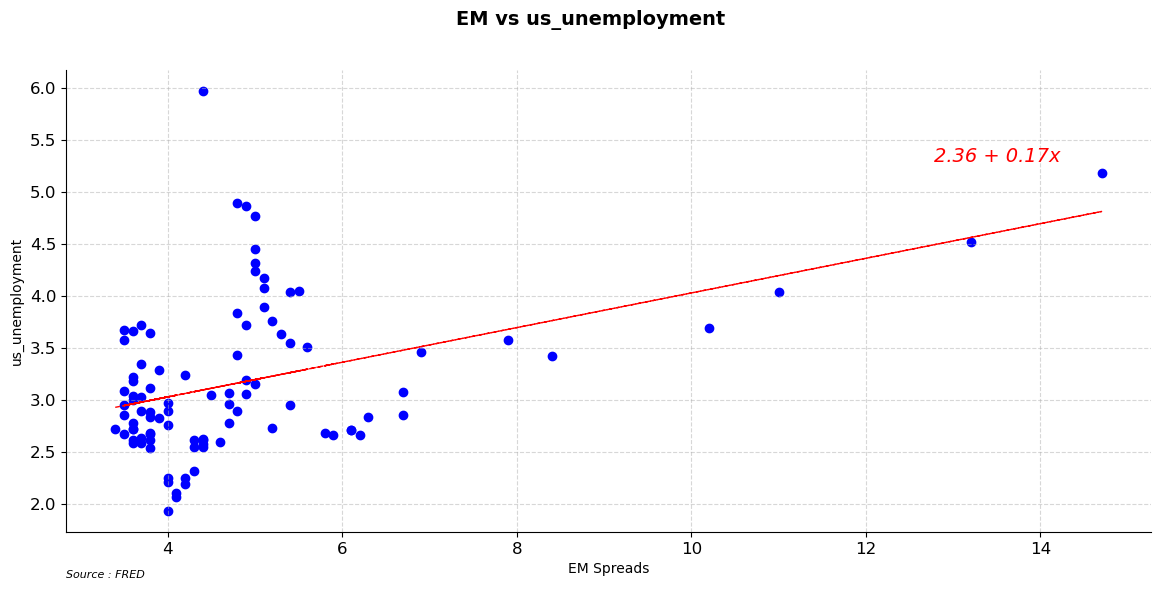

In [34]:
#Params
i = 'us_unemployment'
x = sm.add_constant(X[i])
model = sm.OLS(y, x).fit()

_y = model.params[1]*X[i] + model.params[0]

#Plot
f, ax = plt.subplots(figsize=(14,6))
f.suptitle(f'EM Spreads vs {i}', fontsize = 14, fontweight = 'bold')

ax.scatter(X[i], y, color = 'blue')
ax.plot(X[i], _y, color='red', lw=1, ls='dashed')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha = 0.5, ls = '--')
ax.set_xlabel('EM Spreads')
ax.set_ylabel(i)

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax.text(0.8, 0.8, f'{round(model.params[0], 2)} + {round(model.params[1], 2)}x',
              fontstyle = 'italic',
                color='red',
              fontsize = 14, 
              transform = ax.transAxes)

void = ax.text(0, -0.1, 'Source : FRED',
              fontstyle = 'italic',
              fontsize = 8,
              transform = ax.transAxes)

In [ ]:
# Normalized

In [ ]:
_X = X.loc[:, X.columns != 'const']
norm_X = (_X-_X.min()) / (_X.max() - _X.min())
norm_y = (y-y.min()) / (y.max() - y.min())

In [ ]:
#Interactive process
norm_X = norm_X.loc[:, norm_X.columns != 'us_new_home_sales']

In [ ]:
norm_model = sm.OLS(norm_y, norm_X).fit()

In [ ]:
norm_model.summary()

In [ ]:
f, ax = plt.subplots(figsize=(14,6))
f.suptitle('((Normalized)US HY vs model', fontsize = 14, fontweight = 'bold')

ax.plot(norm_y.index, norm_y, color = 'blue', lw = 3, label = 'US HY')
ax.plot(norm_y.index, norm_model.predict(), color = 'r', lw = 1, label = 'Model Fitted Values')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha = 0.5, ls = '--')
ax.legend(loc = 'lower left')

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax.text(0, -0.1, 'Source : FRED',
              fontstyle = 'italic',
              fontsize = 8,
              transform = ax.transAxes)

In [ ]:
#Params
i = 'us_unemployment'
x = sm.add_constant(norm_X[i])
model = sm.OLS(norm_y, x).fit()

_y = model.params[1]*norm_y + model.params[0]

#Plot
f, ax = plt.subplots(figsize=(14,6))
f.suptitle(f'EM vs {i}', fontsize = 14, fontweight = 'bold')

ax.scatter(norm_y, norm_X[i], color = 'blue')
ax.plot(norm_y, _y, color='red', lw=1, ls='dashed')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha = 0.5, ls = '--')
ax.set_xlabel('EM Spreads')
ax.set_ylabel(i)

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax.text(0.8, 0.8, f'{round(model.params[0], 2)} + {round(model.params[1], 2)}x',
              fontstyle = 'italic',
                color='red',
              fontsize = 14)

void = ax.text(0, -0.1, 'Source : FRED',
              fontstyle = 'italic',
              fontsize = 8,
              transform = ax.transAxes)

### US Treasury Rates

In [151]:
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import statsmodels.api as sm
import numpy as np

from datetime import date
from numpy import log

sys.path.append(os.getcwd() + '/../..')
import macrodata as md

In [152]:
start_dt = date(2010, 1, 1)
end_dt = date(2023, 2, 1)

In [83]:
us10y = md.Explorer.listHistory(['us_10y_rate'], start_dt, end_dt)

In [153]:
us5y = md.Explorer.listHistory(['us_5y_rate'], start_dt, end_dt)

In [154]:
items = ['us_cpi',
         'us_cpi_core',
         'us_nonfarm_payroll_sa',
         'us_avg_hour_earn_sa',
         'us_IG_spread',
         'us_HY_spread',
         'us_unemployment',
         'us_M1',
         'us_michigan_cons_conf',
         'us_durable_goods_new_orders',
         'us_new_home_sales',
         'us_housing_starts',
         'SPY']

In [155]:
macro = md.Explorer.listHistory(items, start_dt, end_dt)
macro.interpolate(inplace=True, limit_area='inside')
diff_items = ['us_cpi',
              'us_cpi_core',
              'us_M1',
              'us_durable_goods_new_orders',
              'us_new_home_sales',
              'us_housing_starts',
              'us_avg_hour_earn_sa',
              'SPY']
macro.loc[:, diff_items] = macro.loc[:, diff_items].apply(lambda x: log(x)).diff(12)

In [156]:
X = macro.iloc[12:]
X = sm.add_constant(X)

In [140]:
y = us10y.iloc[12:]

In [146]:
# Interactive process :
X = X.loc[:, X.columns != 'us_nonfarm_payroll_sa']

In [103]:
# Last model :
X.columns

Index(['const', 'us_cpi_core', 'us_nonfarm_payroll_sa', 'us_IG_spread',
       'us_HY_spread', 'us_unemployment', 'us_michigan_cons_conf'],
      dtype='object')

In [147]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            us_10y_rate   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     28.27
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           2.05e-28
Time:                        09:36:45   Log-Likelihood:                -73.720
No. Observations:                 145   AIC:                             169.4
Df Residuals:                     134   BIC:                             202.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           6.9394      0.911      7.615      0.000       5.137       8.742
us_cpi_core                   -15.6854      8.388     -1.870      0.064     -32.276       0.905
us_avg_hour_earn_sa           -15.7318      6.417     -2.452      0.016     -28.423      -3.041
us_IG_spread                    0.5776      0.282      2.047      0.043       0.019       1.136
us_HY_spread                   -0.4293      0.088     -4.880      0.000      -0.603      -0.255
us_unemployment                -0.0585      0.039     -1.499      0.136      -0.136       0.019
us_M1                          -0.5727      0.155     -3.689      0.000      -0.880      -0.266
us_michigan_cons_conf          -0.0228      0.007     -3.467      0.001      -0.036      -0.010
us_durable_goods_new_orders     1.9089      0.573      3.329      0.001       0.775       3.043
us_housing_starts              -1.8218      0.325     -5.608      0.000      -2.464      -1.179
SPY                            -2.2215      0.531     -4.183      0.000      -3.272      -1.171
==============================================================================
Omnibus:                        0.038   Durbin-Watson:                   0.993
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.170
Skew:                          -0.002   Prob(JB):                        0.919
Kurtosis:                       2.833   Cond. No.                     2.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

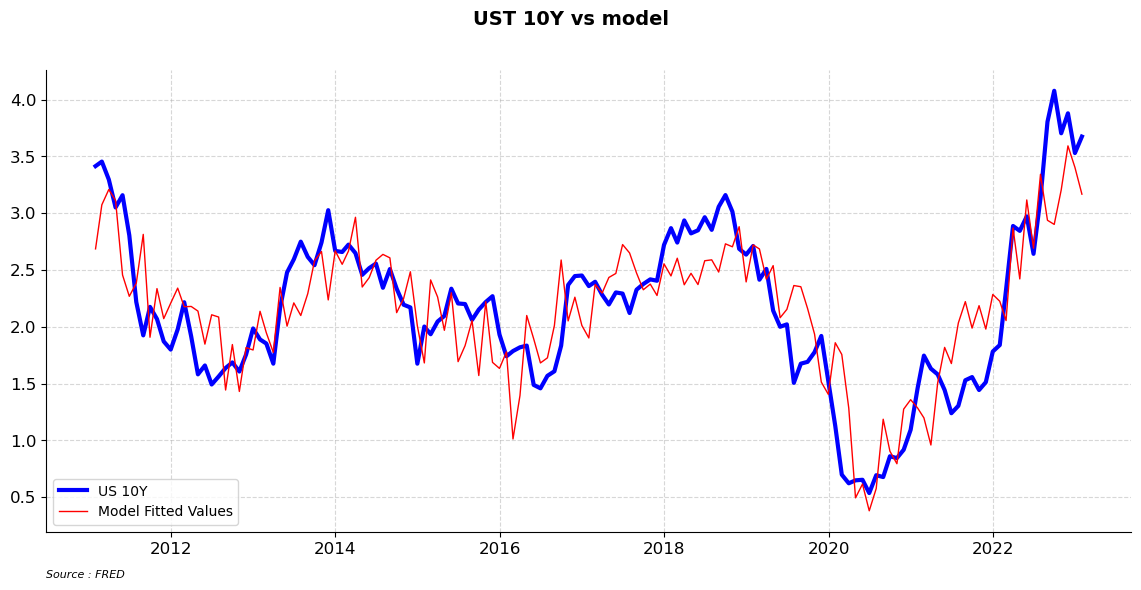

In [148]:
f, ax = plt.subplots(figsize=(14,6))
f.suptitle('UST 10Y vs model', fontsize = 14, fontweight = 'bold')

ax.plot(y.index, y, color = 'blue', lw = 3, label = 'US 10Y')
ax.plot(y.index, model.predict(), color = 'r', lw = 1, label = 'Model Fitted Values')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha = 0.5, ls = '--')
ax.legend(loc = 'lower left')

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax.text(0, -0.1, 'Source : FRED',
              fontstyle = 'italic',
              fontsize = 8,
              transform = ax.transAxes)

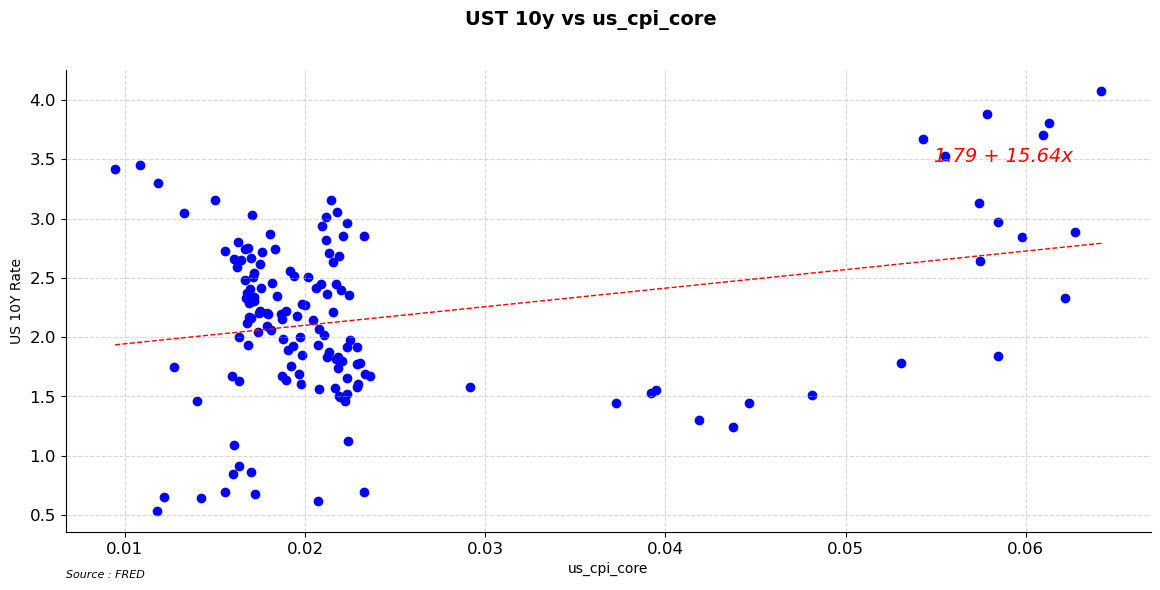

In [150]:
#Params
i = 'us_cpi_core'
x = sm.add_constant(X[i])
model = sm.OLS(y, x).fit()

_x = np.linspace(X[i].min(), X[i].max(), 5)
_y = model.params[1]*_x + model.params[0]

#Plot
f, ax = plt.subplots(figsize=(14,6))
f.suptitle(f'UST 10y vs {i}', fontsize = 14, fontweight = 'bold')

ax.scatter(X[i], y, color = 'blue')
ax.plot(_x, _y, color='red', lw=1, ls='dashed')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha = 0.5, ls = '--')
ax.set_xlabel(i)
ax.set_ylabel('US 10Y Rate')

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax.text(0.8, 0.8, f'{round(model.params[0], 2)} + {round(model.params[1], 2)}x',
              fontstyle = 'italic',
                color='red',
              fontsize = 14, 
              transform = ax.transAxes)

void = ax.text(0, -0.1, 'Source : FRED',
              fontstyle = 'italic',
              fontsize = 8,
              transform = ax.transAxes)

In [ ]:
# 5y

In [157]:
y = us5y.iloc[12:]

In [169]:
# Interactive process :
X = X.loc[:, X.columns != 'us_cpi']

In [129]:
# Last model :
X.columns

Index(['const', 'us_cpi_core', 'us_IG_spread', 'us_HY_spread',
       'us_unemployment', 'us_michigan_cons_conf'],
      dtype='object')

In [170]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             us_5y_rate   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     59.77
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           1.42e-38
Time:                        09:38:32   Log-Likelihood:                -80.302
No. Observations:                 145   AIC:                             176.6
Df Residuals:                     137   BIC:                             200.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           3.8597      0.206     18.782      0.000       3.453       4.266
us_IG_spread                    0.6047      0.289      2.093      0.038       0.033       1.176
us_HY_spread                   -0.4326      0.090     -4.786      0.000      -0.611      -0.254
us_unemployment                -0.0830      0.028     -2.983      0.003      -0.138      -0.028
us_M1                          -0.4833      0.112     -4.305      0.000      -0.705      -0.261
us_durable_goods_new_orders     2.1325      0.444      4.807      0.000       1.255       3.010
us_housing_starts              -2.1350      0.289     -7.399      0.000      -2.706      -1.564
SPY                            -3.1226      0.508     -6.148      0.000      -4.127      -2.118
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.766
Skew:                          -0.162   Prob(JB):                        0.682
Kurtosis:                       3.147   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

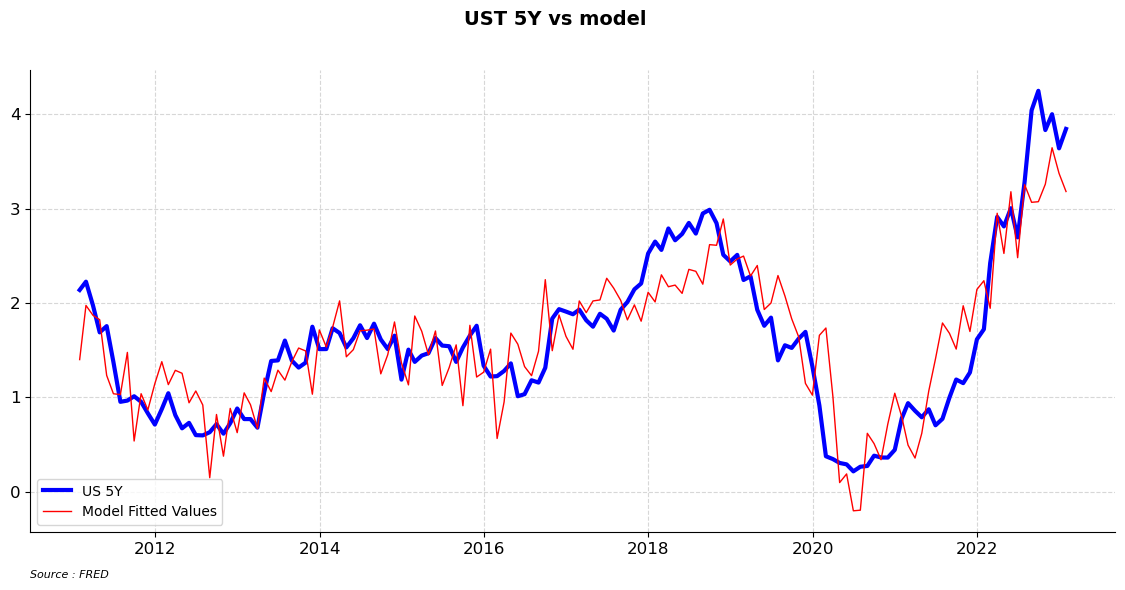

In [171]:
f, ax = plt.subplots(figsize=(14,6))
f.suptitle('UST 5Y vs model', fontsize = 14, fontweight = 'bold')

ax.plot(y.index, y, color = 'blue', lw = 3, label = 'US 5Y')
ax.plot(y.index, model.predict(), color = 'r', lw = 1, label = 'Model Fitted Values')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha = 0.5, ls = '--')
ax.legend(loc = 'lower left')

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax.text(0, -0.1, 'Source : FRED',
              fontstyle = 'italic',
              fontsize = 8,
              transform = ax.transAxes)

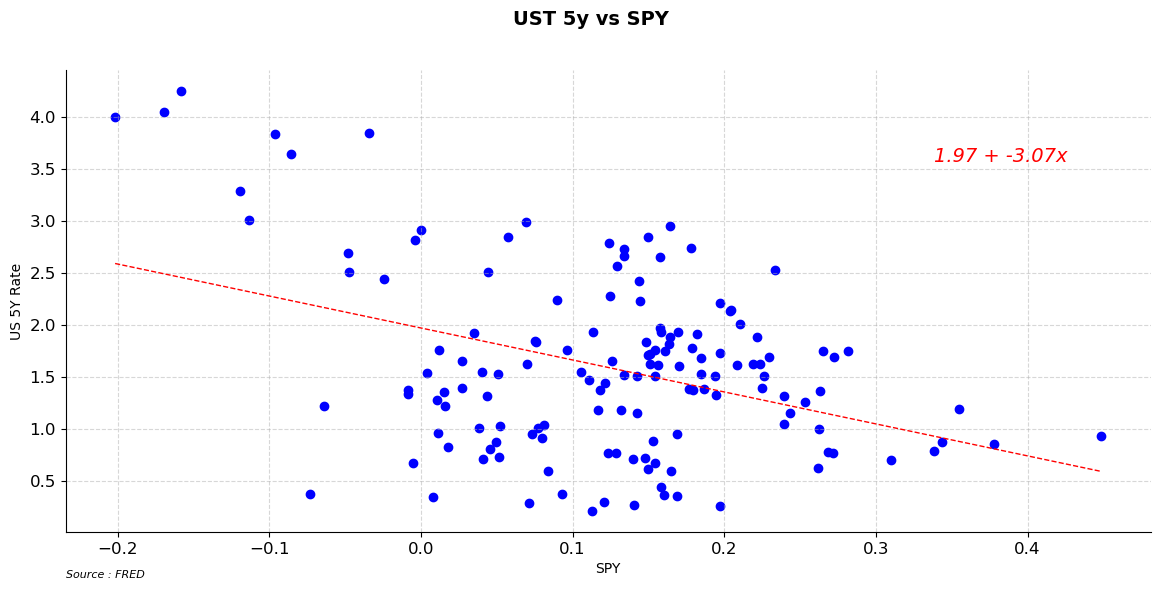

In [173]:
#Params
i = 'SPY'
x = sm.add_constant(X[i])
model = sm.OLS(y, x).fit()

_x = np.linspace(X[i].min(), X[i].max(), 5)
_y = model.params[1]*_x + model.params[0]

#Plot
f, ax = plt.subplots(figsize=(14,6))
f.suptitle(f'UST 5y vs {i}', fontsize = 14, fontweight = 'bold')

ax.scatter(X[i], y, color = 'blue')
ax.plot(_x, _y, color='red', lw=1, ls='dashed')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha = 0.5, ls = '--')
ax.set_xlabel(i)
ax.set_ylabel('US 5Y Rate')

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax.text(0.8, 0.8, f'{round(model.params[0], 2)} + {round(model.params[1], 2)}x',
              fontstyle = 'italic',
                color='red',
              fontsize = 14, 
              transform = ax.transAxes)

void = ax.text(0, -0.1, 'Source : FRED',
              fontstyle = 'italic',
              fontsize = 8,
              transform = ax.transAxes)